# Homework 1

In [1]:
from scipy.special import legendre
from scipy.integrate import trapz
from numpy import exp, linspace
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coefficient(order):
    x = linspace(-1, 1, 10000)
    c = 0.5 * trapz(exp(-x) * legendre(order)(x), x)
    return c

In [3]:
coefficient(0)

1.1752011975619223

In [4]:
coefficient(1)

-0.36787945023419416

In [5]:
coefficient(2)

0.07156288948148833

In [11]:
def error(order):
    x = linspace(-1, 1, 1000000)
    p = approx(x, order)
    t = exp(-x)
    e = (p - t) / t
    return max(e)

In [7]:
error(10)

0.6800059694498818

In [8]:
def approx(x, order):
    ans = 0
    cs = [coefficient(i) for i in range(order+1)]
    ls = [legendre(i)(x) for i in range(order+1)]
    return np.array(cs) @ np.array(ls)

In [9]:
def approx_plot(order):
    x = linspace(-1, 1, 1000)
    plt.plot(x, approx(x, order))
    plt.plot(x, exp(x))
    plt.show()

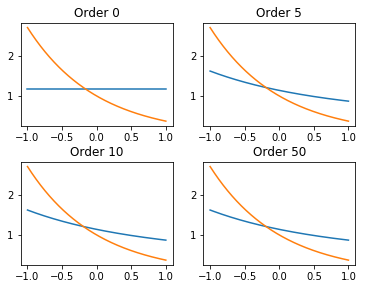

In [10]:
f = plt.figure()

x = linspace(-1, 1, 1000)

ax1 = f.add_subplot(221)
ax1.plot(x, approx(x, 0))
ax1.plot(x, exp(-x))
ax1.set_title('Order 0')

ax2 = f.add_subplot(222)
ax2.plot(x, approx(x, 5))
ax2.plot(x, exp(-x))
ax2.set_title('Order 5')

ax3 = f.add_subplot(223)
ax3.plot(x, approx(x, 10))
ax3.plot(x, exp(-x))
ax3.set_title('Order 10')

ax4 = f.add_subplot(224)
ax4.plot(x, approx(x, 50))
ax4.plot(x, exp(-x))
ax4.set_title('Order 50')

plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.35)

plt.show()


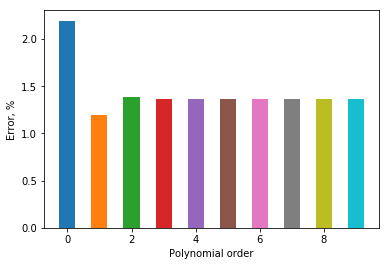

In [18]:
for i in range(10):
    plt.bar(x = i, height=error(i), width=0.5)
plt.ylabel('Error, %')
plt.xlabel('Polynomial order')
plt.show()